# Problema

Se debe entregar un archivo Base_prueba_evaluado.csv con las columnas de llave y probabilidad, la columna probabilidad es un valor real (es decir fraccionario) entre 0 y 1, dónde 0 indicará que no hay ninguna posibilidad de que la obligación se auto cure, 1 indicará que la obligación se auto curará con total certeza y 0.5, por ejemplo, indicaría que existe igual probabilidad de que se auto cure o no, es decir, la columna probabilidad debe entregar la probabilidad de que la variable respuesta definida en la sección 2 sea 1.


# Importando Librerias 

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time

# Análizando variables de mayor peso

In [34]:
data = pd.read_csv('Base_entrenamiento.csv')
a=data.corr()
a

,max_trim,max_sem,desv_sem,prom_bim,max_mes_anterior,prom_mes_anterior,prom_sem,max_bim,mejor_gestion,prom_trim,...,pc_productos_no_rotativos_entidad,pc_saldo_no_rot_ent,pc_vi_no_rotativos_entidad,dh_min_dia_entradas,pcons_hipotecario_vivienda,gsm_mejor_gestion_3m,dh_avg_dia_salidas,y_auto_cura,llave,anhomes_ciclo
max_trim,1.000000,0.882082,0.803823,0.891706,0.766275,0.766275,0.880591,0.920522,0.033449,0.954645,...,-0.006058,-0.008943,-0.009694,0.086853,0.007128,0.007972,-0.012330,-0.234079,0.009913,0.016438
max_sem,0.882082,1.000000,0.942085,0.798026,0.688249,0.688249,0.936169,0.815061,0.025973,0.855132,...,-0.011730,-0.014489,-0.014532,0.095012,0.004072,0.005334,-0.012839,-0.234419,0.018553,0.014162
desv_sem,0.803823,0.942085,1.000000,0.664875,0.554149,0.554149,0.797701,0.715645,0.022557,0.720271,...,-0.010543,-0.013101,-0.013719,0.094179,-0.005418,0.003933,-0.002615,-0.243318,0.020395,0.013352
prom_bim,0.891706,0.798026,0.664875,1.000000,0.917223,0.917223,0.851411,0.966362,0.025991,0.963935,...,-0.004742,-0.008571,-0.009248,0.089438,0.010507,0.008674,-0.007125,-0.207218,0.002138,0.018079
max_mes_anterior,0.766275,0.688249,0.554149,0.917223,1.000000,1.000000,0.744890,0.829655,0.018741,0.851363,...,0.002584,-0.001958,-0.002750,0.091561,0.009274,0.013445,0.008647,-0.181297,0.001791,0.018762
prom_mes_anterior,0.766275,0.688249,0.554149,0.917223,1.000000,1.000000,0.744890,0.829655,0.018741,0.851363,...,0.002584,-0.001958,-0.002750,0.091561,0.009274,0.013445,0.008647,-0.181297,0.001791,0.018762
prom_sem,0.880591,0.936169,0.797701,0.851411,0.744890,0.744890,1.000000,0.834778,0.027474,0.913171,...,-0.014848,-0.014849,-0.014344,0.083399,0.008541,0.003167,-0.024872,-0.205150,0.010125,0.004077
max_bim,0.920522,0.815061,0.715645,0.966362,0.829655,0.829655,0.834778,1.000000,0.031626,0.946091,...,-0.003732,-0.007726,-0.008782,0.088822,0.009807,0.009638,-0.009223,-0.223322,0.004084,0.020240
mejor_gestion,0.033449,0.025973,0.022557,0.025991,0.018741,0.018741,0.027474,0.031626,1.000000,0.031828,...,-0.002108,-0.002261,-0.002358,0.011689,-0.005286,0.090170,0.007888,-0.005216,-0.003098,0.024192
prom_trim,0.954645,0.855132,0.720271,0.963935,0.851363,0.851363,0.913171,0.946091,0.031828,1.000000,...,-0.008685,-0.010422,-0.010605,0.086397,0.011945,0.005814,-0.016224,-0.213810,0.004784,0.011981


# Graficando correlación 

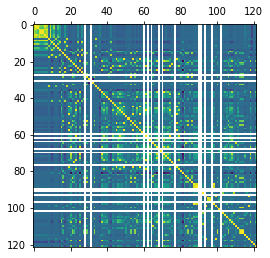

In [35]:
plt.matshow(data.corr())
plt.show()

# Creando set de entrenamiento y de pruebas

In [161]:
dataset = pd.read_csv('Base_entrenamiento.csv')
dataTest = pd.read_csv('Base_prueba.csv')
X = dataset.iloc[:, 0:118].values
y = dataset.iloc[:, [119]].values

# Dividir el data set en conjunto de entrenamiento y conjunto de testing 

In [170]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
X_test2 = dataTest.iloc[:, 0:118].values

# Escalado de variables

In [171]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
X_test2 = sc_X.transform(X_test2)

In [172]:
# Ajustar el clasificador  Random Forest en el Conjunto de Entrenamiento

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = "entropy", random_state = 0)
classifier.fit(X_train, y_train)

C:\Users\Ariel Chitay\Anaconda3\envs\tensor_flow_cpu_2\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [178]:
# Predicción de los resultados con el Conjunto de Testing
y_proba=  classifier.predict_proba(X_test)
y_pred  = classifier.predict(X_test)

# Elaborar una matriz de confusión

In [174]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [175]:
df=pd.DataFrame(cm)
df

,0,1
0,570,674
1,258,2498


### El modelo posee una eficiencia de un 76.7%. Se procede a utilizar el modelo de prueba

In [176]:
# Predicción Final para categorizaciòn de Datos
y_pred2  = classifier.predict(X_test2)
df2=pd.DataFrame(y_pred2)
df2.to_csv(r'BAM', index=True)

In [190]:
# Predicción Final para probabilidades de categorías
y_proba2 =  classifier.predict_proba(X_test2)
df3=pd.DataFrame(y_proba2)
df3.to_csv(r'BAMproba', index=True)

In [191]:
len(y_proba2)

1000